In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
FILE = 'energy_NJ_per_bit.txt' # arquivo de interesse
colunas = ['InterfModel','node 1', 'node 2', 'node 3', 'node 4', 'node 5']
# dictData = dict() # dicionario que concentrara todos os dados 
DATA = pd.DataFrame()

In [3]:
def modificar_valor_InterfModel(item):
    tmp = item.strip()
    nro = int(tmp[-1:])
    return nro

In [4]:
def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

In [5]:
# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

In [6]:
for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['InterfModel'] = dfPRR['InterfModel'].apply(modificar_valor_InterfModel)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')
#del dfPRR

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [7]:
DATA.head(10)

,InterfModel,node 1,node 2,node 3,node 4,node 5,simulacao
0,0,102.752,103.044,67.357,46.057,47.027,PA
1,1,108.034,108.545,70.316,52.628,54.479,PA
2,2,105.913,102.929,69.388,49.388,51.840,PA
3,0,107.721,106.148,84.643,47.680,62.219,PB
4,1,134.739,133.308,116.419,67.170,113.731,PB
5,2,120.949,103.190,100.383,53.223,84.996,PB
6,0,106.389,100.907,71.766,55.054,58.262,p=0.1
7,1,119.949,113.639,103.727,88.507,116.718,p=0.1
8,2,112.465,100.352,82.233,62.782,77.166,p=0.1
9,0,104.050,100.440,69.504,53.352,56.163,p=0.2


In [8]:
dfData = DATA.melt(id_vars=['InterfModel', 'simulacao'],
          value_vars=['node 1', 'node 2', 'node 3', 'node 4', 'node 5'],
          var_name='node',
          value_name = 'NJ Bit'
         )

In [9]:
dfData.head(10)

,InterfModel,simulacao,node,NJ Bit
0,0,PA,node 1,102.752
1,1,PA,node 1,108.034
2,2,PA,node 1,105.913
3,0,PB,node 1,107.721
4,1,PB,node 1,134.739
5,2,PB,node 1,120.949
6,0,p=0.1,node 1,106.389
7,1,p=0.1,node 1,119.949
8,2,p=0.1,node 1,112.465
9,0,p=0.2,node 1,104.050


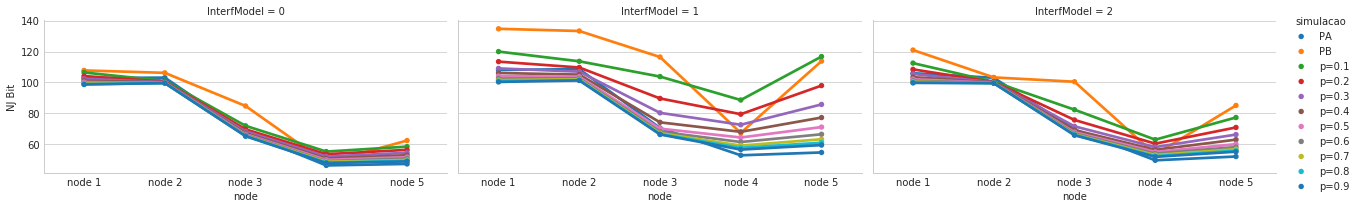

In [17]:
g = sns.factorplot(x="node", y="NJ Bit", col="InterfModel", hue="simulacao", 
                   data=dfData,
                   kind='point',
                   col_wrap=3,
                   join=True,
                   palette="tab10",
                   markers='.',
                   size=3,
                   aspect=2)


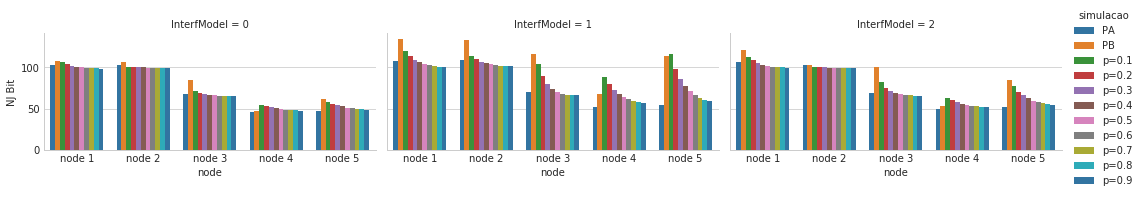

In [11]:
g = sns.factorplot(x="node", y="NJ Bit", col="InterfModel", hue="simulacao", 
                   data=dfData,
                   kind='bar',
                   col_wrap=3,
                   palette="tab10",
                   size=2.5,
                   aspect=2)
#g.set(ylim=(0,1))

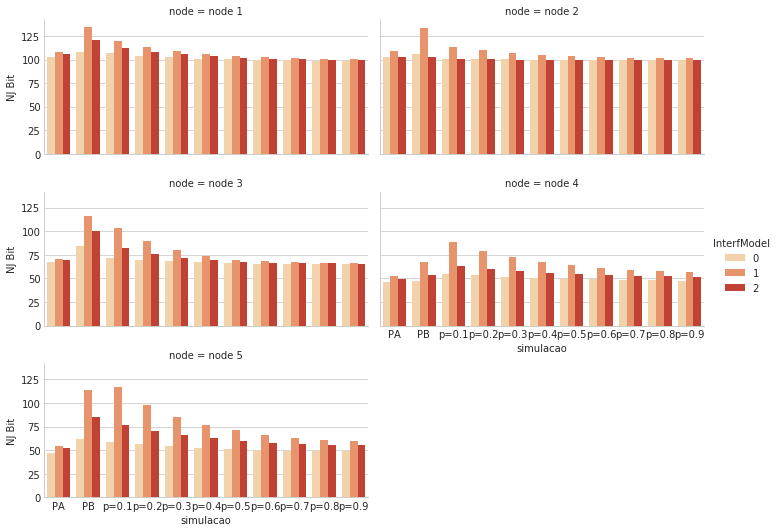

In [12]:
g = sns.factorplot(x="simulacao", y="NJ Bit", hue="InterfModel", col="node", 
                   data=dfData,
                   kind='bar',
                   col_wrap=2,
                   palette="OrRd",
                   size=2.5,
                   aspect=2)

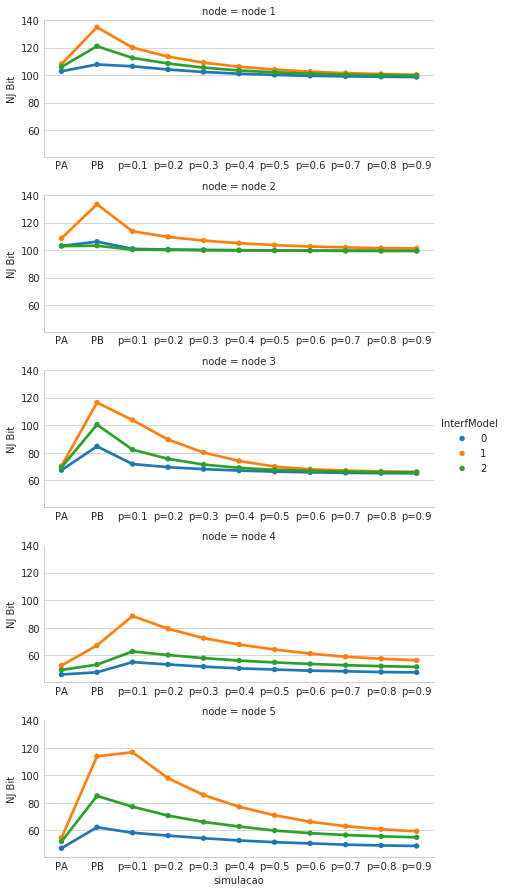

In [22]:
g = sns.factorplot(x="simulacao", y="NJ Bit", hue="InterfModel", row="node", 
                   data=dfData,
                   kind='point',
                   join=True,
                   palette="tab10",
                   markers='.',
                   sharex=False,
                   size=2.5,
                   aspect=2.5)

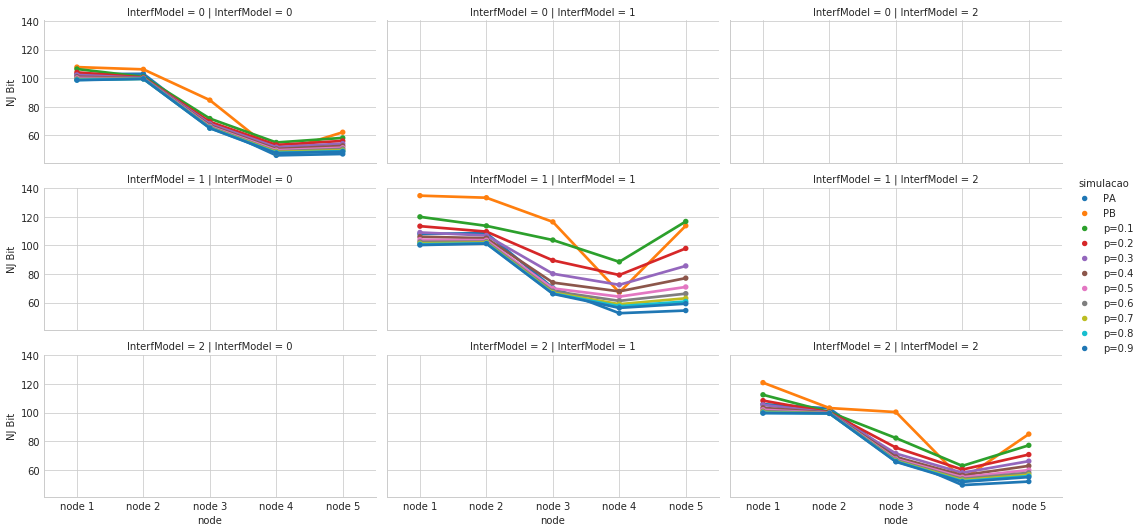

In [16]:
g = sns.factorplot(x='node', y="NJ Bit", hue='simulacao', col="InterfModel", row="InterfModel", 
                   data=dfData,
                   kind='point',
                   join=True,
                   palette="tab10",
                   markers='.',
                   size=2.5,
                   aspect=2)